哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_Taichung = pd.read_csv("B_lvr_land_A.csv")
df_Taipei = pd.read_csv("A_lvr_land_A.csv")
df_Kaohsiung = pd.read_csv("E_lvr_land_A.csv")
df_NewTaipei = pd.read_csv("F_lvr_land_A.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#2.刪除csv中第二列英文翻譯 #刪除row, axis = 0
# https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
df_NewTaipei = df_NewTaipei.drop(labels = 0, axis = 0)
df_Kaohsiung = df_Kaohsiung.drop(labels = 0, axis = 0)
df_Taipei = df_Taipei.drop(labels = 0, axis = 0)
df_Taichung = df_Taichung.drop(labels = 0, axis = 0)

In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei 新北市New_Taipei 台中市Taichung 、高雄市Kaohsiung 
NewTaipei = []
Taipei = []
Taichung = []
Kaohsiung = []
for i in range(len(df_NewTaipei)):
    NewTaipei.append("新北市")
for i in range(len(df_Kaohsiung)):
    Kaohsiung.append("高雄市")
for i in range(len(df_Taipei)):
    Taipei.append("台北市")
for i in range(len(df_Taichung)):
    Taichung.append("台中市")
#   https://www.geeksforgeeks.org/insert-a-given-column-at-a-specific-position-in-a-pandas-dataframe/
df_NewTaipei.insert(loc = 0, column = 'city', value = NewTaipei)
df_Kaohsiung.insert(loc = 0, column = 'city', value = Kaohsiung)
df_Taipei.insert(loc = 0, column = 'city', value = Taipei)
df_Taichung.insert(loc = 0, column = 'city', value = Taichung)

In [5]:
df = pd.concat((df_NewTaipei, df_Kaohsiung, df_Taichung, df_Taipei), axis = 0)

In [6]:
# 產生以字母順序為主的內容
# df.sort_values(by = ['鄉鎮市區'], inplace = True, ascending = True)

In [7]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat((df_Taipei, df_NewTaipei, df_Taichung, df_Kaohsiung), axis = 0)

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [8]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [9]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
df = df.rename(columns = columns_mapping)

In [10]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值

# 做邏輯運算需加入括號才不會報錯
df = df[(df["main_use"] == "住家用") & (df["use_zoning"] == "住")]
# isna() 每個資料欄位都會出現是否為na, any()則是叫出哪個部分有na
df[analysis_columns].isna().any() # 可以看到 unit_price有缺失值

# 處理缺失值
df = df.dropna(how = 'any', axis = 0, subset = analysis_columns)

# how : any -> 有任一欄位有缺失值就刪除、 all -> 全部欄位都是缺失值才刪除。subset是篩選的欄位。 axis = 0 刪除row, axis = 1 刪除column 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   transaction_sign            7802 non-null   object 
 3   house_number                7802 non-null   object 
 4   land_area_square_meter      7802 non-null   object 
 5   use_zoning                  7802 non-null   object 
 6   land_use_district           1 non-null      object 
 7   land_use                    0 non-null      object 
 8   tx_dt                       7802 non-null   object 
 9   transaction_pen_number      7802 non-null   object 
 10  shifting_level              7802 non-null   object 
 11  total_floor_number          7796 non-null   object 
 12  building_state              7802 non-null   object 
 13  main_use                    7802

In [11]:
#3. 將一些本應為數值型態，卻為object的資料，透過設定好的dict，將資料型態透過astype作轉換
df = df.astype(columns_type)

In [12]:
# 處理過後的資料
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   transaction_sign            7802 non-null   object 
 3   house_number                7802 non-null   object 
 4   land_area_square_meter      7802 non-null   object 
 5   use_zoning                  7802 non-null   object 
 6   land_use_district           1 non-null      object 
 7   land_use                    0 non-null      object 
 8   tx_dt                       7802 non-null   object 
 9   transaction_pen_number      7802 non-null   object 
 10  shifting_level              7802 non-null   object 
 11  total_floor_number          7796 non-null   object 
 12  building_state              7802 non-null   object 
 13  main_use                    7802

In [13]:
# 將交易日期切割成年月日、並且把舊的column換掉
year = df["tx_dt"].apply(lambda x : x[0:3])
month = df["tx_dt"].apply(lambda x : x[3:5])
day = df["tx_dt"].apply(lambda x : x[5:7])

df.insert(loc = 8, column = 'tx_dt_year', value = year)
df.insert(loc = 9, column = 'tx_dt_month', value = month)
df.insert(loc = 10, column = 'tx_dt_day', value = day)

del df["tx_dt"]

In [14]:
# tx_dt_year 限制在109年 & 1 <= room_number <= 5 & 1 <= hall_number <= 2
# 備註：邏輯運算無法直接輸入一個區間？
df = df[(df["room_number"] <= 5) & (df["room_number"] >= 1) & (df["tx_dt_year"] == "109") & (df["hall_number"] <= 2) & (df["hall_number"] >= 1)]
# 重新排列索引值 https://ithelp.ithome.com.tw/articles/10194006
df.reset_index(inplace = True)

In [15]:
# 確認dataframe index是否成功修改
df.index

RangeIndex(start=0, stop=6894, step=1)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [16]:
# 建立新特徵 -> 將牽涉到平方公尺的資料轉換為坪的資料(備註：1坪 = 1面積平方公尺 * 0.3025)
# 1. building_area_square_feet : building_area * 0.3025 
# 2. main_building_area_square_feet : main_building_area *0.3025
# 3. unit_price_square_feet : unit_price /0.3025
df["building_area_square_feet"] = df["building_area_square_meter"] * 0.3025
df["main_building_area_square_feet"] = df["main_building_area"] * 0.3025
df["unit_price_square_feet"] = df["unit_price"] / 0.3025

In [95]:
# 處理異常值，並解說為何刪除
# 1. unit_price = 0 
df = df.drop(np.where(df["unit_price"] == 0)[0])

In [96]:
df = df[df["main_building_area"] != 0]

In [97]:
df.describe()

,index,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet,towns_label
count,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6.779000e+03,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6.779000e+03,6779.000000
mean,3384.048237,121.691134,2.846585,1.792447,1.729606,1.145647e+07,94938.402567,82.455862,4.899659,5.118786,36.811568,24.942898,3.138460e+05,38.130108
std,2219.418844,62.900743,0.898217,0.405585,0.679047,1.166032e+07,58491.082003,36.807078,7.785089,6.055969,19.027475,11.134141,1.933589e+05,25.185881
min,1.000000,7.440000,1.000000,1.000000,0.000000,4.700000e+05,3239.000000,7.440000,0.000000,0.000000,2.250600,2.250600,1.070744e+04,0.000000
25%,1561.000000,82.940000,2.000000,2.000000,1.000000,5.600000e+06,53835.000000,60.925000,0.000000,0.000000,25.089350,18.429812,1.779669e+05,16.000000
50%,3065.000000,109.300000,3.000000,2.000000,2.000000,8.600000e+06,80052.000000,79.000000,1.180000,3.030000,33.063250,23.897500,2.646347e+05,39.000000
75%,5083.500000,147.430000,3.000000,2.000000,2.000000,1.338000e+07,119189.000000,95.935000,8.330000,9.490000,44.597575,29.020337,3.940132e+05,58.000000
max,12633.000000,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06,87.000000


In [98]:
# 異常值判斷（標準差）
def outlier_zscore(data, times):
    mean = data.mean()
    stdev = data.std()
    z_scores = [(y - mean) / stdev for y in data]
    return np.where(np.abs(z_scores) > times) # return index

out_index = outlier_zscore(df["total_price"], 3)
print(df["total_price"].loc[out_index[0]])

11      48000000
44      62700000
45      49680000
47      87500000
76      53000000
          ...   
2471     8500000
2533     4000000
3045    11300000
3468     4900000
4379     3370000
Name: total_price, Length: 101, dtype: int64


In [99]:
def iqr(data, times):
    q1, q3 = np.nanpercentile(data, [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + (times * iqr)
    lower_bound = q1 - (times * iqr)
    return np.where((data > upper_bound) | (data < lower_bound))
out_index_iqr = iqr(df["total_price"], 1.5)
print(df["total_price"].loc[out_index_iqr[0]])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

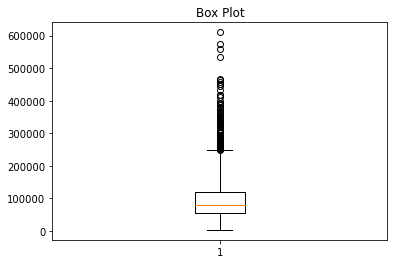

In [100]:
plt.boxplot(df['unit_price'][~np.isnan(df['unit_price'])], whis = 2)  # ~ 是反運算的意思。也就是說，在這段語法要取出的Age這個欄位不是nan的值。
plt.title('Box Plot')
plt.show()

# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [101]:
df

,index,city,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt_year,...,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet,towns_label
0,1,Taipei,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,109,...,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,69.547775,33.550275,517629.752066,39
1,2,Taipei,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,109,...,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,11.286275,7.435450,494406.611570,39
2,5,Taipei,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,109,...,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,37.407150,29.868850,488677.685950,39
3,7,Taipei,文山區,房地(土地+建物),臺北市文山區木柵路四段159巷170弄1~30號,30.65,住,NaN,NaN,109,...,親友、員工或其他特殊關係間之交易。;,RPQNMLQLNHPFFAA08CA,90.78,11.51,12.93,NaN,37.585625,27.460950,212846.280992,39
4,8,Taipei,文山區,房地(土地+建物),臺北市文山區興隆路三段112巷4弄1~30號,9.84,住,NaN,NaN,109,...,親友、員工或其他特殊關係間之交易。;,RPSPMLTJOHPFFAA68CA,26.15,0.00,4.01,NaN,9.123400,7.910375,241137.190083,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,10589,Kaohsiung,路竹區,房地(土地+建物),大社路126巷151~180號,61.22,住,NaN,NaN,109,...,NaN,RPTNMLRJQHPFFJE47EA,80.42,0.00,0.00,無,24.327050,24.327050,147983.471074,79
6890,11925,Kaohsiung,路竹區,房地(土地+建物)+車位,國昌路151~180號,23.41,住,NaN,NaN,109,...,NaN,RPUNMLRKQHPFFJE57DA,86.24,14.25,0.00,有,42.383275,26.087600,125047.933884,79
6891,12019,Kaohsiung,路竹區,房地(土地+建物),中山路712巷31~60號,26.74,住,NaN,NaN,109,...,NaN,RPQNMLTKQHPFFJE37DA,101.76,7.62,0.00,有,43.789900,30.782400,115322.314050,79
6892,12236,Kaohsiung,茄萣區,房地(土地+建物),建中街61~90號,19.33,住,NaN,NaN,109,...,NaN,RPSNMLOLQHPFFJE27EA,144.40,19.94,0.00,有,63.760950,43.681000,42657.851240,71


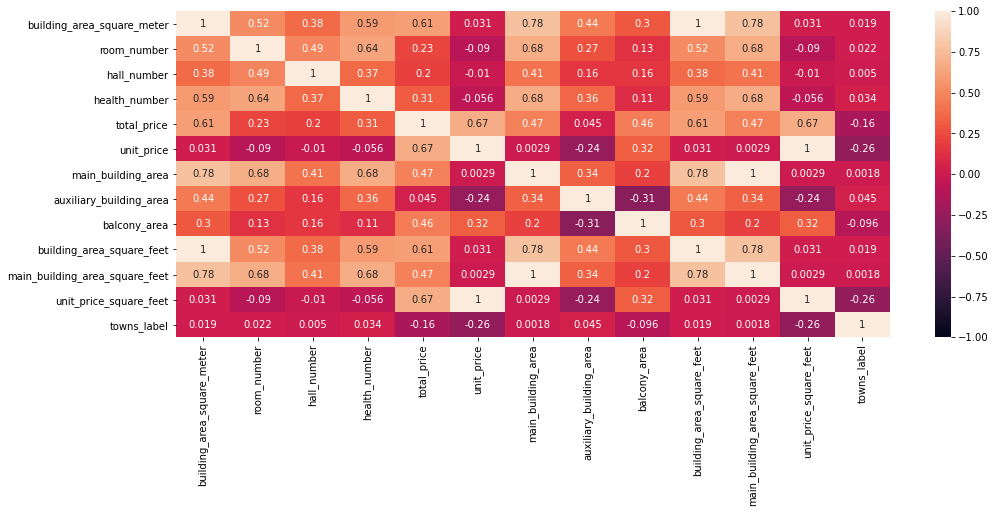

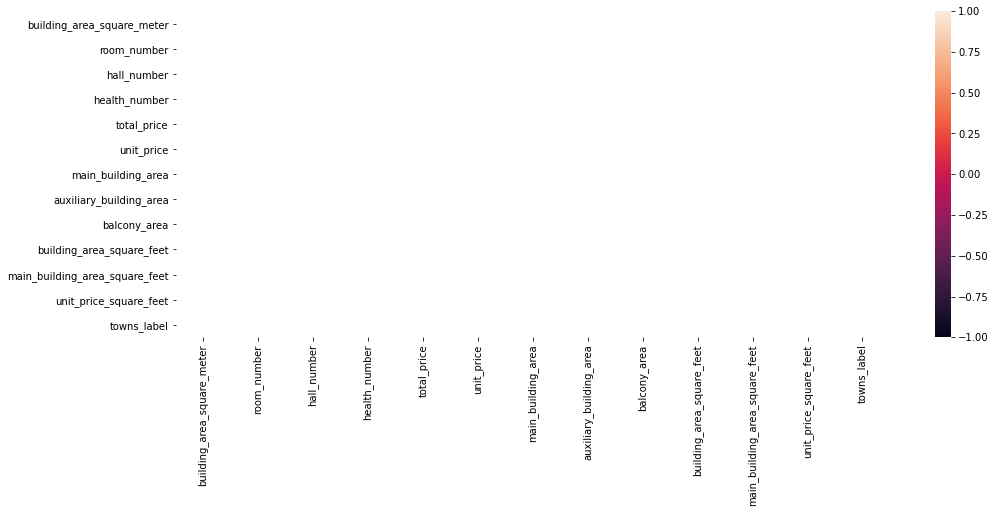

In [102]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
corr_df = df.drop(["index"], axis = 1)
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(corr_df.corr(), vmin = -1, vmax = 1, annot = True)
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
corr_df_taipei = corr_df[corr_df["city"] == "台北市"]
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(corr_df_taipei.corr(), vmin = -1, vmax = 1, annot = True)
# Answer : building_area_square_meter, main_building, building_area_square_feet, main_building_area_square_feet
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
# Answer : square_feet

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [103]:
dic_city = {"台北市" : "Taipei", "新北市" : "New Taipei City", "台中市" : "Taichung", "高雄市" : "Kaohsiung"}
df = df.replace({"city" : dic_city})

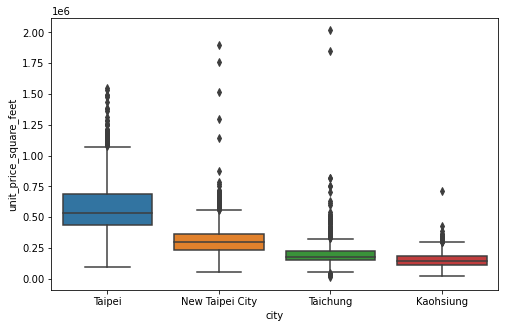

In [104]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
fig = plt.figure(figsize = (8, 5))
sns.boxplot(x = 'city', y = 'unit_price_square_feet', data = df)


### Answer : 單價元坪中位數最高的是台北市

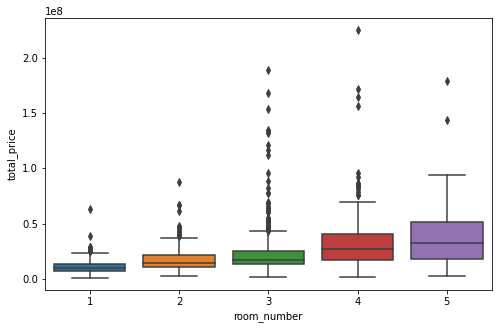

In [105]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
fig = plt.figure(figsize = (8, 5))
sns.boxplot(x = "room_number", y = "total_price", data = df[df["city"] == "Taipei"])

### 台北，中位數最高的房價是5間房間

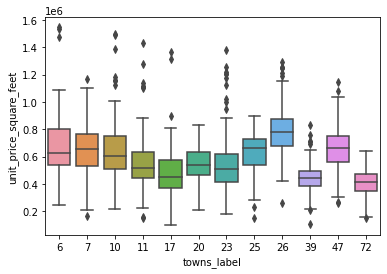

In [106]:
#3. 對台北市的資料做圖，先將地區(towns)做編碼在進行，再以地區(town)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(towns)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['towns_label'] = le.fit_transform(df['towns'])
sns.boxplot(x = 'towns_label', y = 'unit_price_square_feet', data = df[df["city"] == "Taipei"])

In [107]:
# hint:運用LabelEncoder()對地區(towns)做編碼，運用.inverse_transform()反查編碼的地區
le.inverse_transform([6])

array(['中山區'], dtype=object)